# Crimes in Boston

## Introduction

Crime rates vary from place to place depending on many factors. Crimes include but not limit to murders, rapes, robberies, assaults, burglaries, thefts, auto thefts, arson, law enforcement employees, police officers and so on. They can be categorized into two types e.g., violent crimes and property crime. A violent crime is a crime in which an offender or perpetrator uses or threatens to use force upon a victim. This entails both crimes in which the violent act is the objective, such as murder or rape, as well as crimes in which violence is the means to an end (Wikipedia). Property crime, on the other hand, is a crime that includes, among other crimes, burglary, larceny, theft, motor vehicle theft, arson, shoplifting, and vandalism. Property crime is a crime to obtain money, property, or some other benefit. This may involve force, or the threat of force, in cases like robbery or extortion (Wikipedia). The crime cost per annual in the United Of America have been estimated from \\$690 billion up to \\$3.41 trillion [1]. Understanding the crimes' nature and roots is very crucial for individual, society, and nation as a whole. First of all, it can help individual better prepare themselves not to become the victim. It can also help society to take action to minimize crime rate for the safety and wealth of the community. Moreover, reducing crime rate can help a country minimizing its expense on social safety and increasing the harmony of the people. 

In this study, I aim at integrating the crime data in Boston with the Fourquare map data to identify the relatioship between crime types with the venues in the Foursquare. The relationship can reveal what kind of crimes more often happen in a specific area of Boston city.  

## Dataset

Thee datasets are used in this study including **i)** list of United States cities by crime rate [2], **ii)** US crime incident report [3], and **iii)** Foursquare [4]. In this section, we shall explore the data by using visualization techniques to get a quick understanding of the data at hand.  

In US crime incident dataset, we select only three features from the whole dataset. They are including **city**, **total violent crime**, and **total property crime**. These three feature can tell us which city is safer comparing to the others. In the Boston crime dataset which is our main objective of the project, we select some features such as **OFFENSE_CODE_GROUP**, **District**, **Latitude**, and **Longitude** to integrate with Foursquare dataset to work on map later.  

Whenever we make a call to Foursquare database, we get a list of name, unique ID, location, and category which can be integrate with crime data that also contain the location. Hence, utilizing these two datasets can help us identify the relaship between crimes and venues.  

In [278]:
# Importing some libraries to work on

import numpy as np
# import k-means from clustering stage
from sklearn.cluster import KMeans
import requests # library to handle requests
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
from matplotlib.pyplot import figure

First of all, we give an overview of the crime rate in many cities around US which obtain from Wikipedia. 

In [279]:
# Reading the first dataset
# URL of the data to be read from wiki
url_data = 'https://en.wikipedia.org/wiki/List_of_United_States_cities_by_crime_rate'

The following table of United States cities by crime rate is based on Federal Bureau of Investigation Uniform Crime Reports statistics from 2017 for the top 100 most populous cities in America that have reported data to the FBI UCR system

In [280]:
# Using pandas to read html
df_wiki = pd.read_html(url_data, header =0, flavor = 'bs4')

# Capture only the table data
df = df_wiki[0]

In [281]:
df.head()

,State,City,Population,Violent crime,Violent crime.1,Violent crime.2,Violent crime.3,Violent crime.4,Property crime,Property crime.1,Property crime.2,Property crime.3,Arson2
0,State,City,Population,Total,Murder and Nonnegligent manslaughter,Rape1,Robbery,Aggravated assault,Total,Burglary,Larceny-theft,Motor vehicle theft,Arson2
1,Alabama,Mobile3,248431,740.25,20.13,57.16,177.11,485.85,5453.83,1216.84,3730.21,506.78,22.94
2,Alaska,Anchorage,296188,1203.29,9.12,132.01,262.67,799.49,5415.82,748.17,3619.66,1047.98,20.93
3,Arizona,Chandler,249355,259.47,2.01,52.13,56.95,148.38,2329.61,314.41,1866.01,149.18,NaN
4,Arizona,Gilbert,242090,85.51,2.07,16.11,21.07,46.26,1385.85,192.49,1137.59,55.76,12.39


In [282]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

In [283]:
df.head()

,State,City,Population,Total,Murder and Nonnegligent manslaughter,Rape1,Robbery,Aggravated assault,Total,Burglary,Larceny-theft,Motor vehicle theft,Arson2
1,Alabama,Mobile3,248431,740.25,20.13,57.16,177.11,485.85,5453.83,1216.84,3730.21,506.78,22.94
2,Alaska,Anchorage,296188,1203.29,9.12,132.01,262.67,799.49,5415.82,748.17,3619.66,1047.98,20.93
3,Arizona,Chandler,249355,259.47,2.01,52.13,56.95,148.38,2329.61,314.41,1866.01,149.18,NaN
4,Arizona,Gilbert,242090,85.51,2.07,16.11,21.07,46.26,1385.85,192.49,1137.59,55.76,12.39
5,Arizona,Glendale,249273,488.22,4.81,38.91,192.96,251.53,4530.37,637.45,3426.36,466.56,19.26


In [284]:
df.columns.values[3] = "Total violent crime"
df.columns.values[8] = "Total property crime"
df.head()

,State,City,Population,Total violent crime,Murder and Nonnegligent manslaughter,Rape1,Robbery,Aggravated assault,Total property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson2
1,Alabama,Mobile3,248431,740.25,20.13,57.16,177.11,485.85,5453.83,1216.84,3730.21,506.78,22.94
2,Alaska,Anchorage,296188,1203.29,9.12,132.01,262.67,799.49,5415.82,748.17,3619.66,1047.98,20.93
3,Arizona,Chandler,249355,259.47,2.01,52.13,56.95,148.38,2329.61,314.41,1866.01,149.18,NaN
4,Arizona,Gilbert,242090,85.51,2.07,16.11,21.07,46.26,1385.85,192.49,1137.59,55.76,12.39
5,Arizona,Glendale,249273,488.22,4.81,38.91,192.96,251.53,4530.37,637.45,3426.36,466.56,19.26


In [289]:
df_city_crime = df[['City','Total violent crime','Total property crime']]
# Drop NaN records
df_city_crime = df_city_crime.dropna() 

In [290]:
df_city_crime.head()

,City,Total violent crime,Total property crime
1,Mobile3,740.25,5453.83
2,Anchorage,1203.29,5415.82
3,Chandler,259.47,2329.61
4,Gilbert,85.51,1385.85
5,Glendale,488.22,4530.37


Plotting violent crime rate by city

Text(0.5, 1.0, 'Total violent crime by city')

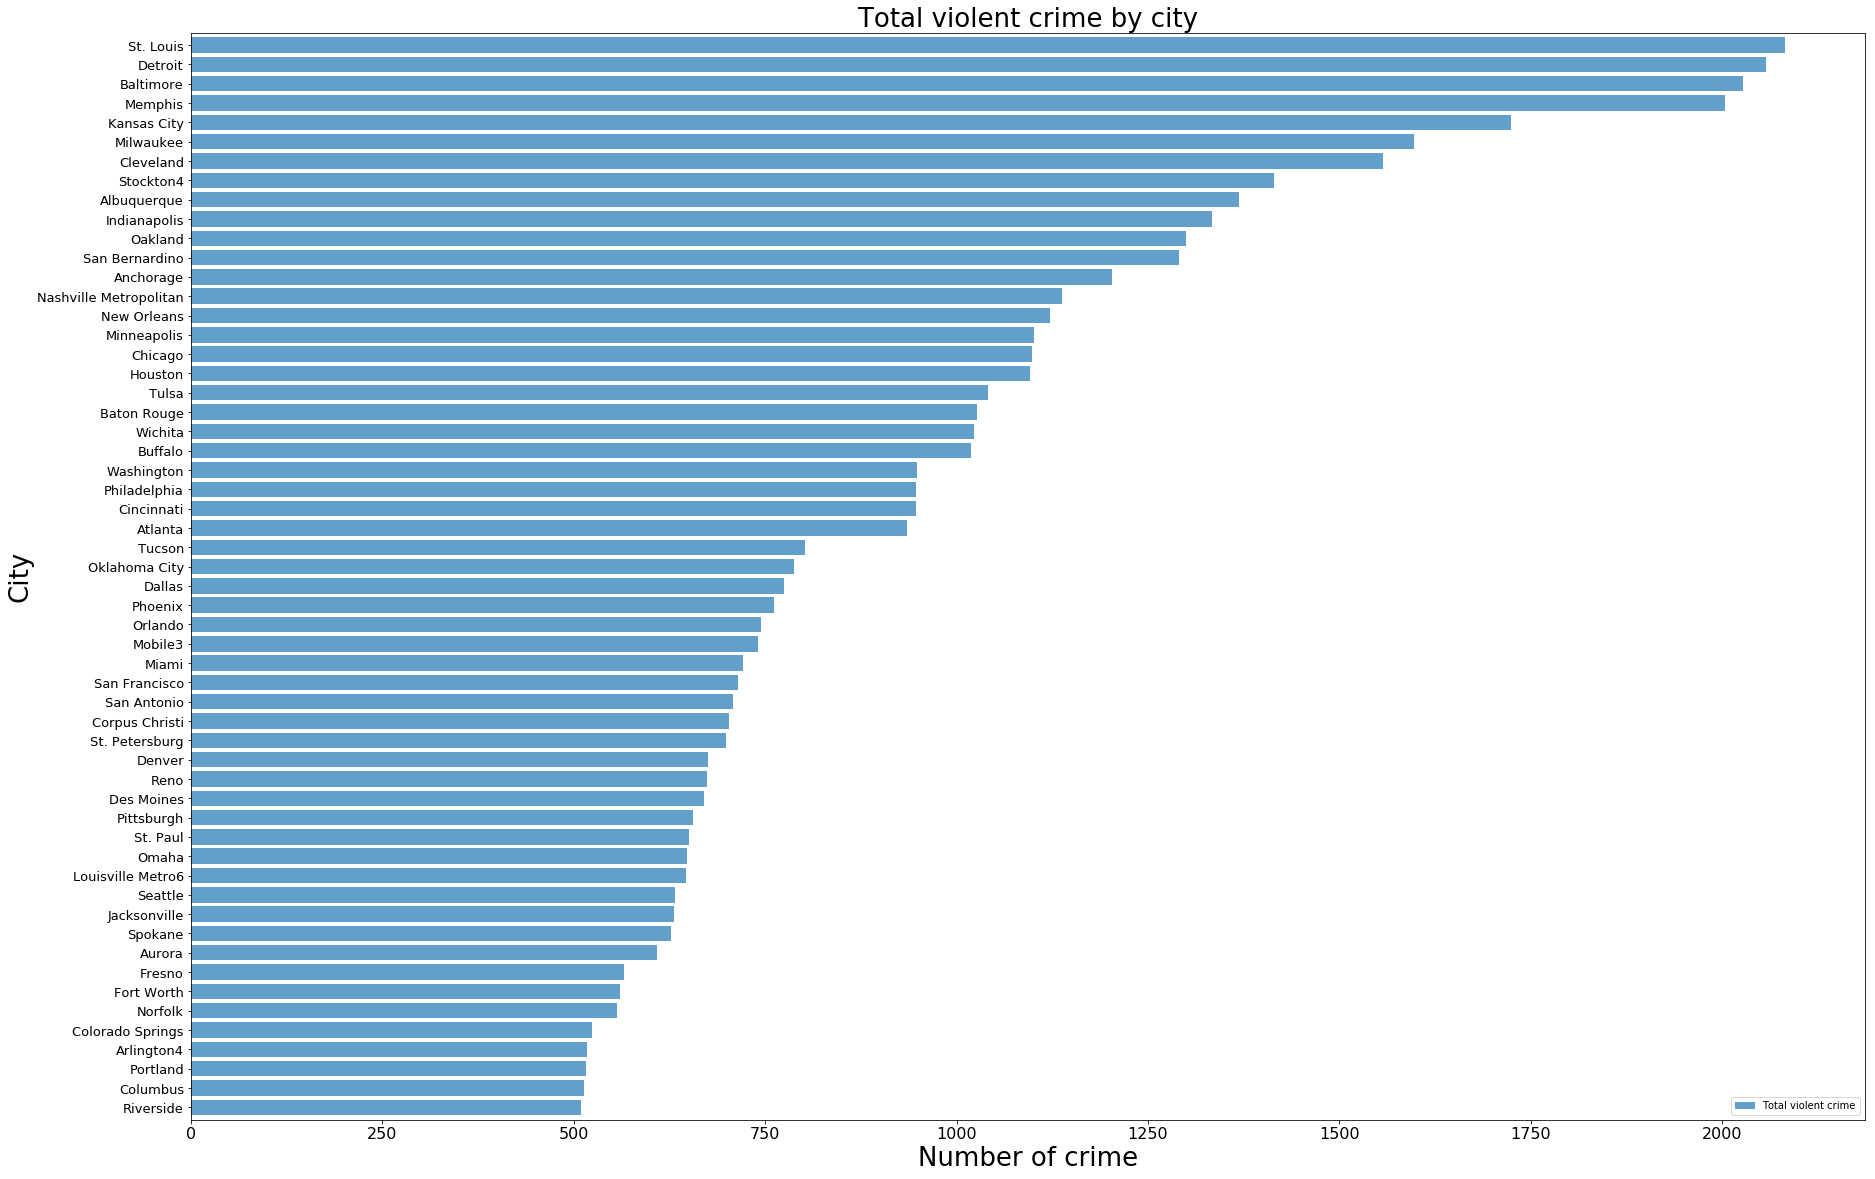

In [301]:
df_city_crime["Total violent crime"] = pd.to_numeric(df_city_crime["Total violent crime"])
df_city_crime = df_city_crime.sort_values(by='Total violent crime', ascending=True)
indexNames = df_city_crime[ df_city_crime['Total violent crime'] < 500 ].index
# Delete these row indexes from dataFrame
df_city_crime.drop(indexNames , inplace=True)
df_city_crime.plot.barh(x='City', y='Total violent crime', width=0.8, alpha=0.7)
plt.rcParams["figure.figsize"] = (30,20)
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=13
plt.xlabel('Number of crime', fontsize=26)
plt.ylabel('City', fontsize=26)
plt.title('Total violent crime by city', fontsize=26)

Plotting propert crime rate

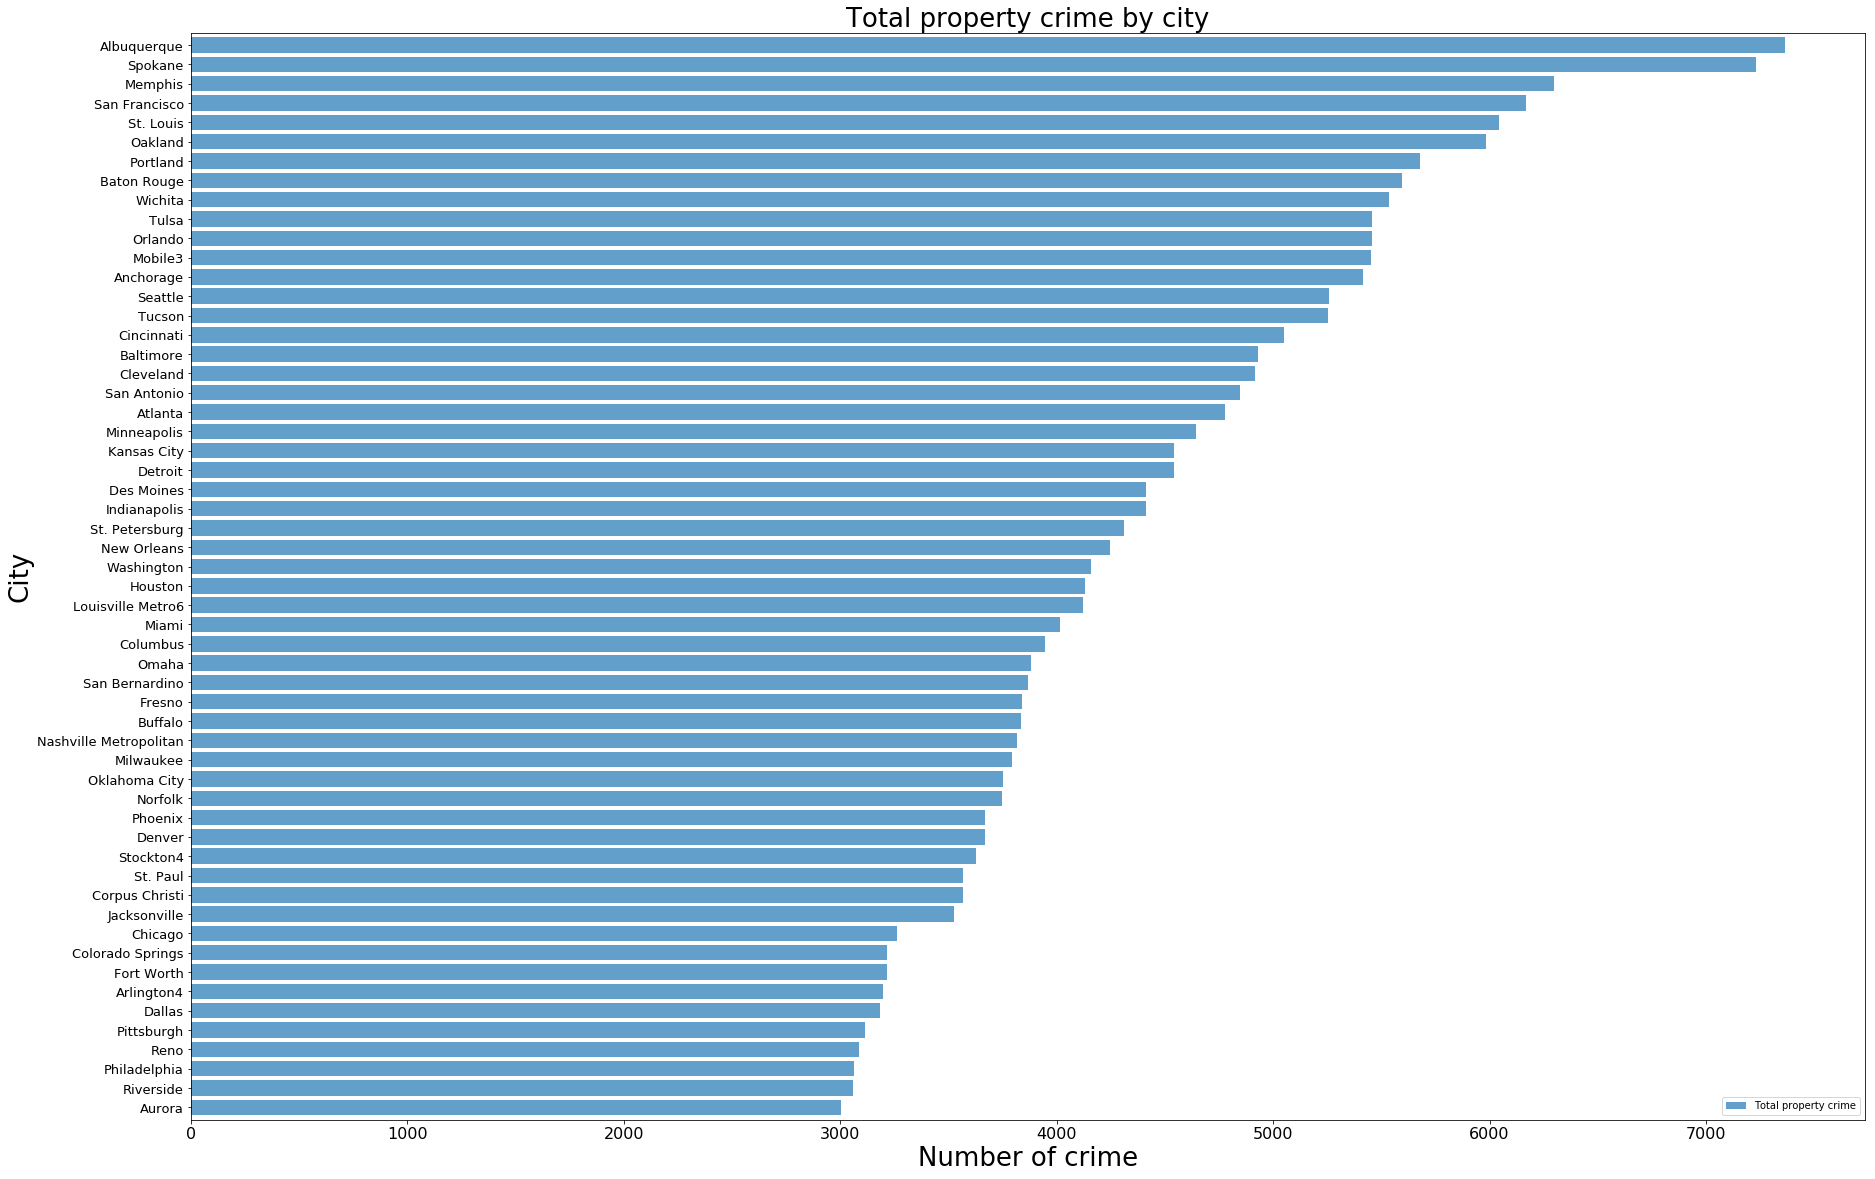

<Figure size 2160x720 with 0 Axes>

In [302]:
df_city_crime["Total property crime"] = pd.to_numeric(df_city_crime["Total property crime"])
df_city_crime = df_city_crime.sort_values(by='Total property crime', ascending=True)
indexNames = df_city_crime[ df_city_crime['Total property crime'] < 3000 ].index
# Delete these row indexes from dataFrame
df_city_crime.drop(indexNames , inplace=True)
df_city_crime.plot.barh(x='City', y='Total property crime', width=0.8, alpha=0.7)
plt.rcParams["figure.figsize"] = (30,10)
plt.rcParams['ytick.labelsize']=10
plt.title('Total property crime by city', fontsize=26)
plt.ylabel('City', fontsize=26)
plt.xlabel('Number of crime', fontsize=26)
fig = plt.figure()

# Exploring **Boston** crime dataset 

In [266]:
df_boston = pd.read_csv('tmpxcahxwwg.csv')
#df_la_long = pd.read_csv('Geospatial_Coordinates.csv')

In [159]:
df_boston.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192056355,2647,Other,THREATS TO DO BODILY HARM,B3,422,NaN,2019-07-21 20:21:00,2019,7,Sunday,20,Part Two,RIVER ST,42.271330,-71.082999,"(42.27133005, -71.08299865)"
1,I192056350,520,Residential Burglary,BURGLARY - RESIDENTIAL - FORCE,B2,585,NaN,2019-07-21 21:08:00,2019,7,Sunday,21,Part One,JUDGE ST,42.329454,-71.102712,"(42.32945358, -71.10271179)"
2,I192056348,2900,Other,VAL - VIOLATION OF AUTO LAW - OTHER,B2,566,NaN,2019-07-21 19:27:00,2019,7,Sunday,19,Part Two,AMERICAN LEGION HWY,42.294999,-71.093066,"(42.29499937, -71.09306615)"
3,I192056346,613,Larceny,LARCENY SHOPLIFTING,A7,26,NaN,2019-07-21 20:48:00,2019,7,Sunday,20,Part One,BORDER ST,42.376203,-71.039799,"(42.37620267, -71.03979926)"
4,I192056345,1402,Vandalism,VANDALISM,B3,427,NaN,2019-07-21 20:16:00,2019,7,Sunday,20,Part Two,FESSENDEN ST,42.278560,-71.091997,"(42.27855984, -71.09199697)"


In [207]:
df_code_group = df_boston[['OFFENSE_CODE_GROUP', 'INCIDENT_NUMBER']]
df_code_group.head()

,OFFENSE_CODE_GROUP,INCIDENT_NUMBER
0,Other,I192056355
1,Residential Burglary,I192056350
2,Other,I192056348
3,Larceny,I192056346
4,Vandalism,I192056345


In [176]:
count_crime = df_code_group.groupby('OFFENSE_CODE_GROUP').size().to_frame('Number of crime')
count_crime['OFFENSE_CODE_GROUP'] = count_crime.index
count_crime.head()

,Number of crime,OFFENSE_CODE_GROUP
OFFENSE_CODE_GROUP,,
Aggravated Assault,10095,Aggravated Assault
Aircraft,57,Aircraft
Arson,108,Arson
Assembly or Gathering Violations,1115,Assembly or Gathering Violations
Auto Theft,5891,Auto Theft


(27, 2)
Index([], dtype='object', name='OFFENSE_CODE_GROUP')
(27, 2)


Text(0.5, 0, 'Number of crime')

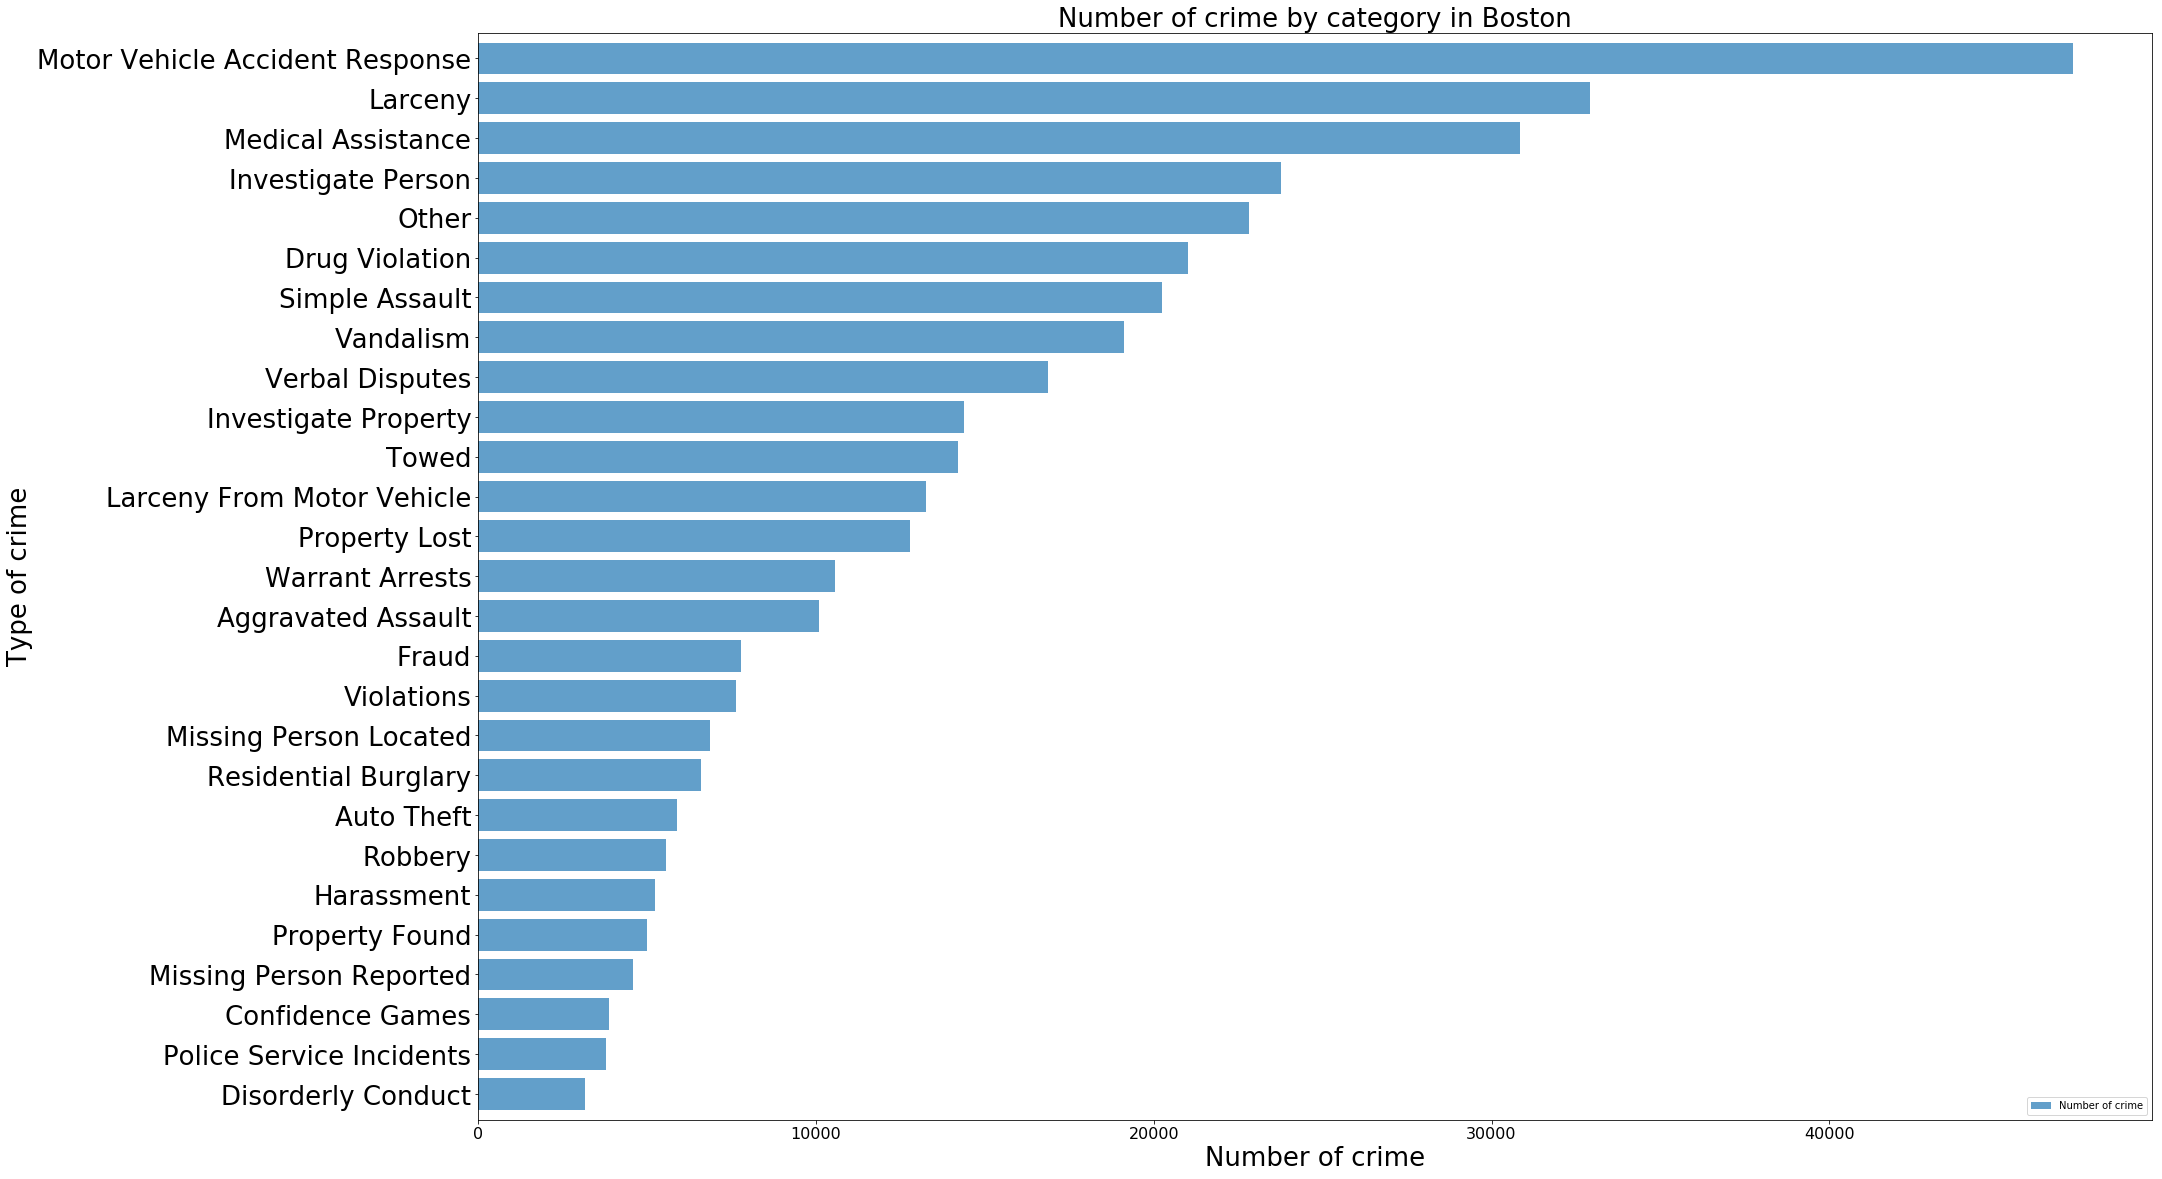

In [304]:
count_crime = count_crime.sort_values(by='Number of crime', ascending=True)
print(count_crime.shape) # size before delete rows
indexNames = count_crime[ count_crime['Number of crime'] < 3000 ].index
print(indexNames)
# Delete these row indexes from dataFrame
count_crime.drop(indexNames , inplace=True)
print(count_crime.shape) # size after delete rows
count_crime.plot.barh(x='OFFENSE_CODE_GROUP', y='Number of crime', width=0.8, alpha=0.7)
plt.rcParams["figure.figsize"] = (30,20)
#plt.ylabel('ylabel', fontsize=26)
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=26
plt.title('Number of crime by category in Boston', fontsize=26)
plt.ylabel('Type of crime', fontsize=26)
plt.xlabel('Number of crime', fontsize=26)

# Method

In this section, we discuss the method that will be used in our analysis. 

(0, 0)

## References

[1] Maure, Diana. "Costs of crime: experts report challenges estimating costs and suggest improvements to better inform policy decisions." (2017).   
[2] https://en.wikipedia.org/wiki/List_of_United_States_cities_by_crime_rate  
[3] https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system  
[4] Foursquare.com   